<a href="https://colab.research.google.com/github/yusufdimari/deep_learning/blob/main/Human_Phenotye_Ontology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ptg=pd.read_csv('/content/drive/MyDrive/DeepLearning/CW/genes_to_phenotype.txt', sep='\t')
gtp=pd.read_csv('/content/drive/MyDrive/DeepLearning/CW/phenotype_to_genes.txt', sep='\t')

In [ ]:
ptg.head()

,ncbi_gene_id,gene_symbol,hpo_id,hpo_name,frequency,disease_id
0,10,NAT2,HP:0000007,Autosomal recessive inheritance,-,OMIM:243400
1,10,NAT2,HP:0001939,Abnormality of metabolism/homeostasis,-,OMIM:243400
2,16,AARS1,HP:0002460,Distal muscle weakness,15/15,OMIM:613287
3,16,AARS1,HP:0002451,Limb dystonia,3/3,OMIM:616339
4,16,AARS1,HP:0008619,Bilateral sensorineural hearing impairment,HP:0040283,ORPHA:33364


In [ ]:
gtp.head()

,hpo_id,hpo_name,ncbi_gene_id,gene_symbol,disease_id
0,HP:0030050,Narcolepsy,3060,HCRT,OMIM:161400
1,HP:0030050,Narcolepsy,1786,DNMT1,ORPHA:314404
2,HP:0030050,Narcolepsy,1786,DNMT1,OMIM:604121
3,HP:0030050,Narcolepsy,4340,MOG,OMIM:614250
4,HP:0030051,Tip-toe gait,6445,SGCG,ORPHA:353


In [ ]:
gtp.describe()

,ncbi_gene_id
count,1.030198e+06
mean,4.176032e+05
std,6.188301e+06
min,1.000000e+01
25%,3.897000e+03
50%,7.468000e+03
75%,5.181600e+04
max,1.207661e+08


In [ ]:
ptg=ptg.drop(['ncbi_gene_id','hpo_id'], axis=1)
ptg.columns=['gene','phenotype','frequency','disease']

In [ ]:
ptg

,gene,phenotype,frequency,disease
0,NAT2,Autosomal recessive inheritance,-,OMIM:243400
1,NAT2,Abnormality of metabolism/homeostasis,-,OMIM:243400
2,AARS1,Distal muscle weakness,15/15,OMIM:613287
3,AARS1,Limb dystonia,3/3,OMIM:616339
4,AARS1,Bilateral sensorineural hearing impairment,HP:0040283,ORPHA:33364
...,...,...,...,...
312807,HRURF,Sparse scalp hair,1/4,OMIM:146550
312808,HRURF,Sparse eyelashes,-,OMIM:146550
312809,HRURF,Sparse eyebrow,4/4,OMIM:146550
312810,HRURF,Alopecia,1/4,OMIM:146550


In [ ]:
gtp=gtp.drop(['hpo_id','ncbi_gene_id'], axis=1)
gtp.columns=['phenotype','gene','disease']

In [ ]:
gtp

,phenotype,gene,disease
0,Narcolepsy,HCRT,OMIM:161400
1,Narcolepsy,DNMT1,ORPHA:314404
2,Narcolepsy,DNMT1,OMIM:604121
3,Narcolepsy,MOG,OMIM:614250
4,Tip-toe gait,SGCG,ORPHA:353
...,...,...,...
1030193,Myotonia of the upper limb,SCN4A,ORPHA:99734
1030194,Myotonia of the lower limb,SCN4A,ORPHA:99734
1030195,Myotonia of the jaw,SCN4A,ORPHA:684
1030196,Myotonia of the face,SCN4A,ORPHA:684


Check for Empty Rows

In [ ]:
ptg.isna().sum()
gtp.isna().sum()

,0
hpo,0
gene,0
disease,0


Check for Duplicates

In [ ]:
ptg.duplicated().sum()
gtp.duplicated().sum()

0

##Visualization

In [ ]:
phenotype_count=gtp['phenotype'].value_counts()
phenotype_count

,count
phenotype,
Mendelian inheritance,6081
Mode of inheritance,5823
All,5821
Phenotypic abnormality,5641
Abnormality of the nervous system,5281
...,...
Decreased circulating alpha-mannosidase activity,1
Abnormality of spinal facet joint,1
Facet joint arthrosis,1


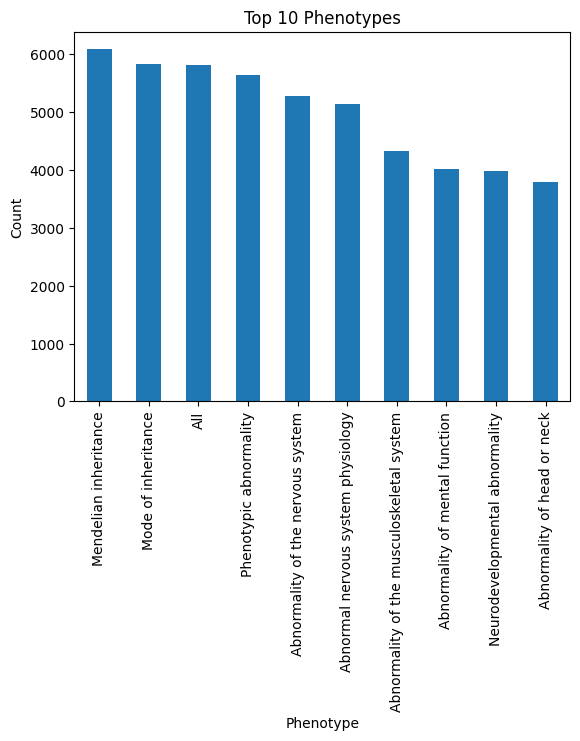

In [ ]:
phenotype_count.head(10).plot(kind='bar')
plt.xlabel('Phenotype')
plt.ylabel('Count')
plt.title('Top 10 Phenotypes')
plt.show()

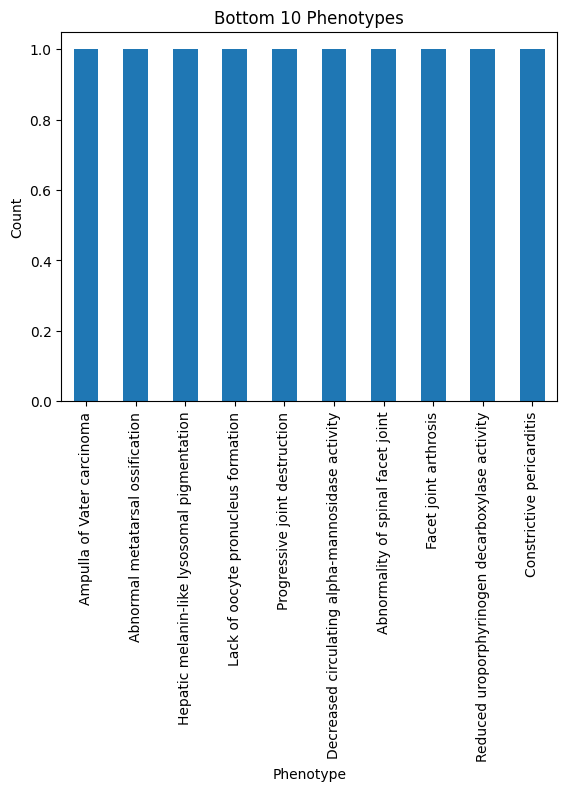

In [ ]:
phenotype_count.tail(10).plot(kind='bar')
plt.xlabel('Phenotype')
plt.ylabel('Count')
plt.title('Bottom 10 Phenotypes')
plt.show()

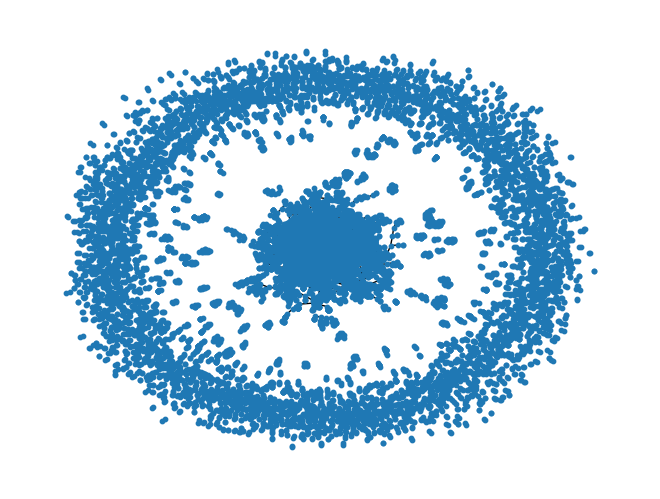

In [ ]:
import networkx as nx

G = nx.from_pandas_edgelist(gtp, source="gene", target="disease")
nx.draw(G, with_labels=False, node_size=10)
plt.show()

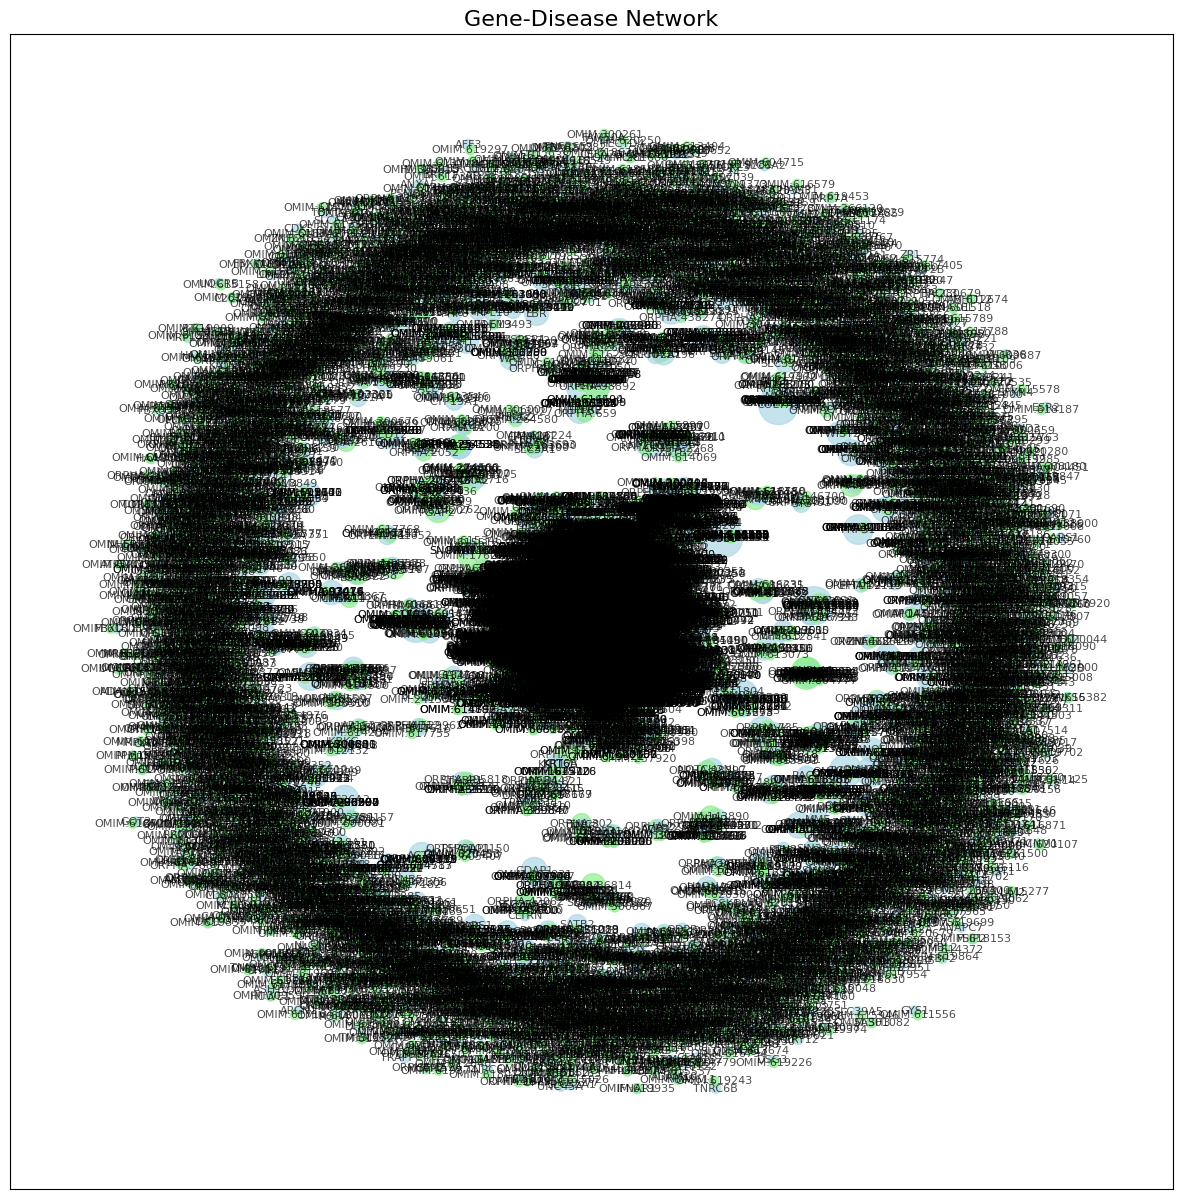

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph from the dataset
G = nx.from_pandas_edgelist(gtp, source="gene", target="disease")

# Set positions for nodes using a spring layout
pos = nx.spring_layout(G, seed=42)

# Calculate degree (number of connections) for each node
node_sizes = [len(list(G.neighbors(n))) * 50 for n in G.nodes]

# Assign colors based on whether the node is a gene or disease
node_colors = [
    "lightblue" if n in gtp["gene"].values else "lightgreen"
    for n in G.nodes
]

# Plot the network
plt.figure(figsize=(15, 15))
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=node_colors,
    font_size=8,
    edge_color="gray",
    alpha=0.7
)
plt.title("Gene-Disease Network", fontsize=16)
plt.show()


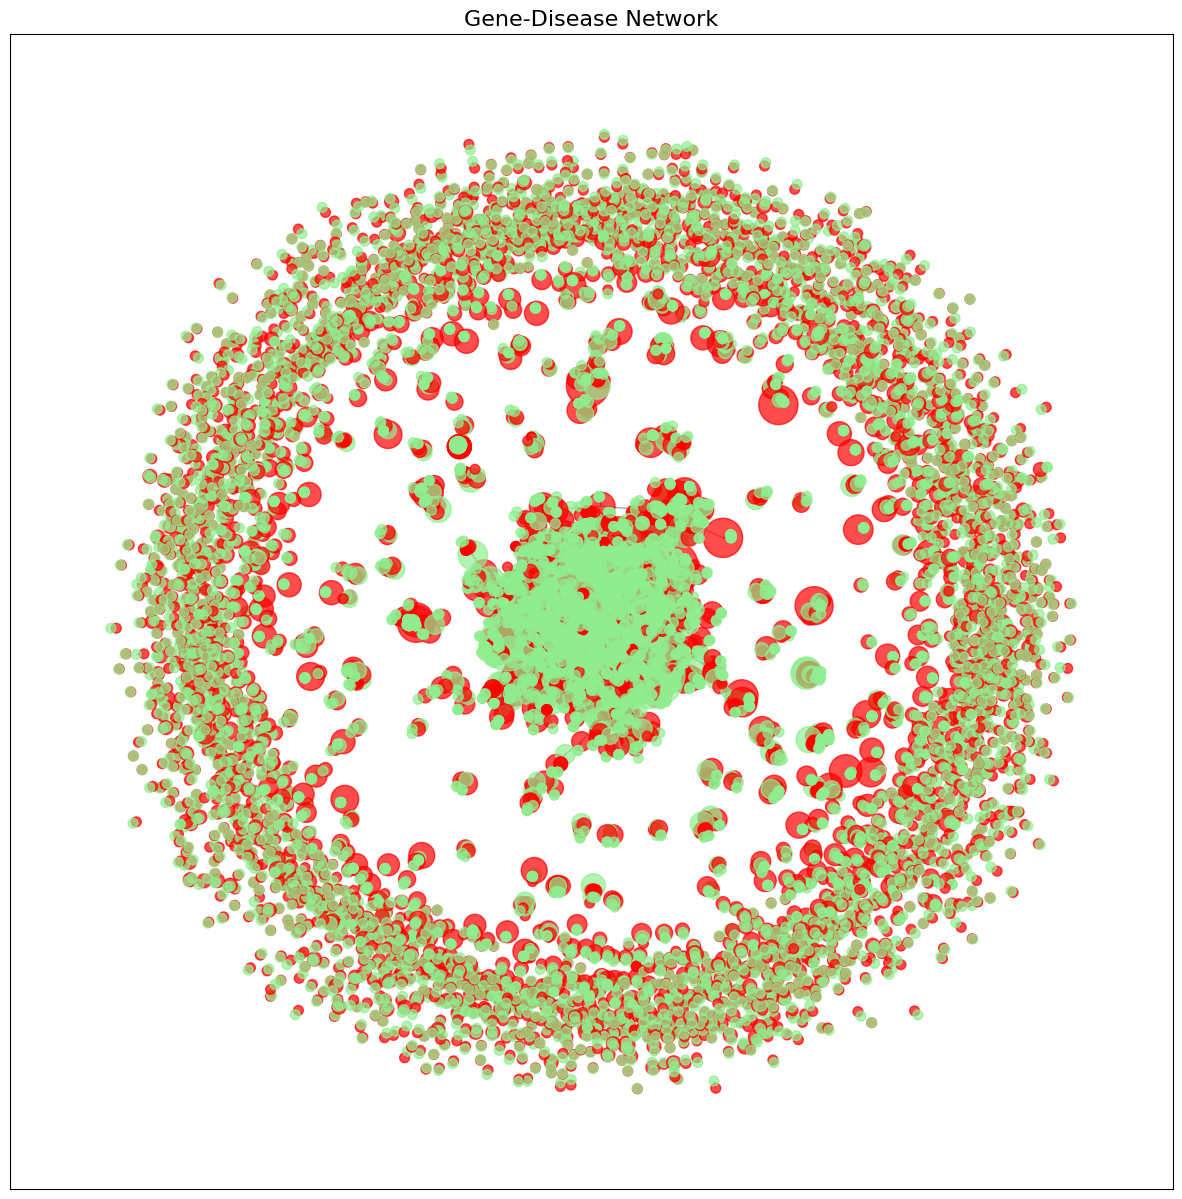

In [ ]:
# Plot the network
node_colors = [
    "red" if n in gtp["gene"].values else "lightgreen"
    for n in G.nodes
]
plt.figure(figsize=(15, 15))
nx.draw_networkx(
    G,
    pos,
    with_labels=False,
    node_size=node_sizes,
    node_color=node_colors,
    font_size=8,
    edge_color="gray",
    alpha=0.7
)
plt.title("Gene-Disease Network", fontsize=16)
plt.show()